practical 4

In [1]:
# Import necessary libraries
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random

In [17]:
# Load the dataset
df1 = pd.read_csv("BostonHousing.csv")

In [18]:
# Check for missing values
df1.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [19]:
# Select the first 50 rows for analysis
df1.head(50)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [22]:
# Selecting features and target variable
x = df1["age"]
y = df1["tax"]

<AxesSubplot:xlabel='age', ylabel='tax'>

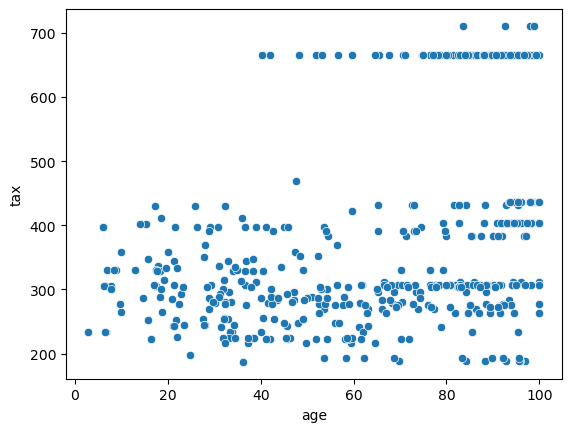

In [23]:
# Scatter plot for visualization
sb.scatterplot(x, y)


In [24]:
# Reshape x to a 2D array (required for scikit-learn)
x = df1[["age"]]

In [25]:
# Split the data into training and testing sets
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.25)

In [26]:
# Create a linear regression model
regr = LinearRegression()


In [27]:
# Fit the model on the training data
regr.fit(x_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the test set
y_pred = regr.predict(x_test)

(array([ 13.,  25.,  21.,  29.,  20.,  29.,  27.,  33.,  48., 134.]),
 array([193.57825156, 228.36605496, 263.15385836, 297.94166176,
        332.72946517, 367.51726857, 402.30507197, 437.09287537,
        471.88067877, 506.66848218, 541.45628558]),
 <BarContainer object of 10 artists>)

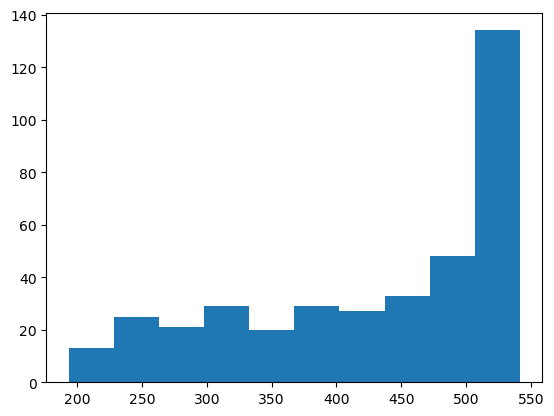

In [29]:
# Visualize the predictions with a histogram
mp.hist(y_pred)

In [30]:
# Display the actual values from the test set
y_test.head(10)

16     307
264    264
161    403
163    403
479    666
182    193
455    666
419    666
289    293
150    403
Name: tax, dtype: int64

In [31]:
# Display the predicted values for the first 10 instances
y_pred[0:10]

array([288.16095082, 511.36179036, 508.49564796, 519.60194976,
       498.46414955, 513.51139716, 493.09013255, 457.26335252,
       265.2318116 , 531.78305497])

In [32]:
# Evaluate the model scores
train_score = regr.score(x_train, y_train)
test_score = regr.score(x_test, y_test)

In [33]:
# Display the scores
train_score
test_score

0.2055075809913257

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.29449242, -0.19449242, -0.09449242,  0.00550758,  0.10550758,
         0.20550758,  0.30550758,  0.40550758,  0.50550758,  0.60550758,
         0.70550758]),
 <BarContainer object of 10 artists>)

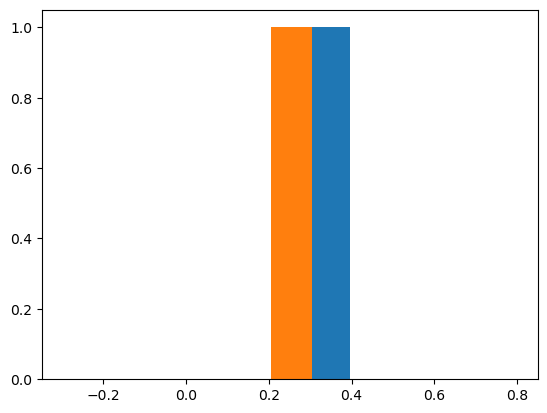

In [34]:
# Visualize the distribution of scores
mp.hist(train_score)
mp.hist(test_score)
